In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\USER\Documents\CAPSTONE\diabetes-predictor\data\raw\diabetes.csv", encoding='latin1')
# Display the first few rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# Display the shape of the DataFrame
df.shape

(768, 9)

In [3]:
#Check the data types of the columns
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
# Check for missing values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# Remove duplicates
df = df.drop_duplicates()

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# Replace biologically impossible zeros with NaN
cols_with_zero_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero_invalid] = df[cols_with_zero_invalid].replace(0, np.nan)

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [9]:
# Check for missing values @ the last 5 rows
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1
767,1,93.0,70.0,31.0,NaN,30.4,0.315,23,0


In [10]:
# Handling Missing Values 
# Median imputation best for handling outliers.
df[cols_with_zero_invalid] = df[cols_with_zero_invalid].fillna(df[cols_with_zero_invalid].median())

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [12]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [13]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [14]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [15]:
df.shape

(768, 9)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    float64
 2   bloodpressure             768 non-null    float64
 3   skinthickness             768 non-null    float64
 4   insulin                   768 non-null    float64
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [17]:
df.isnull().sum()

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64

In [18]:
df.describe()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
# 3. ✅ Add the validation function
def validate_cleaned_data(df):
    print("Shape:", df.shape)
    print("\nMissing values:\n", df.isnull().sum())
    print("\nDuplicates:", df.duplicated().sum())
    print("\nData Types:\n", df.dtypes)
    print("\nTarget balance:\n", df['outcome'].value_counts())
    print("\nSummary Stats:\n", df.describe())

# 4. ✅ Call it before saving
validate_cleaned_data(df)

Shape: (768, 9)

Missing values:
 pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64

Duplicates: 0

Data Types:
 pregnancies                   int64
glucose                     float64
bloodpressure               float64
skinthickness               float64
insulin                     float64
bmi                         float64
diabetespedigreefunction    float64
age                           int64
outcome                       int64
dtype: object

Target balance:
 outcome
0    500
1    268
Name: count, dtype: int64

Summary Stats:
        pregnancies     glucose  bloodpressure  skinthickness     insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
s

In [21]:
def cap_outliers(df, column):
    upper_limit = df[column].quantile(0.95)
    lower_limit = df[column].quantile(0.05)
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])
    df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])
    return df

# Apply capping
df = cap_outliers(df, 'insulin')
df = cap_outliers(df, 'skinthickness')


In [22]:
df.describe()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,28.944857,133.968750,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,7.620646,56.190856,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,14.350000,50.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,44.000000,293.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
def validate_cleaned_data(df):
    print("=== Dataset Shape ===")
    print(df.shape)
    
    print("\n=== Missing Values ===")
    print(df.isnull().sum())
    
    print("\n=== Duplicate Rows ===")
    print(df.duplicated().sum())
    
    print("\n=== Data Types ===")
    print(df.dtypes)
    
    print("\n=== Target Variable Distribution ===")
    print(df['Outcome'].value_counts(normalize=True))  # lowercase 'outcome'
    
    print("\n=== Summary Statistics ===")
    print(df.describe())
    
    print("\n=== Sample Rows ===")
    print(df.sample(5))
    
    print("\n=== Correlation Matrix ===")
    plt.figure(figsize=(10,8))
    sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title("Correlation Matrix")
    plt.show()
    
    for col in ['insulin', 'skinthickness']:
        plt.figure(figsize=(8,4))
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
        plt.show()

        


In [24]:

validate_cleaned_data(df)

=== Dataset Shape ===
(768, 9)

=== Missing Values ===
pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64

=== Duplicate Rows ===
0

=== Data Types ===
pregnancies                   int64
glucose                     float64
bloodpressure               float64
skinthickness               float64
insulin                     float64
bmi                         float64
diabetespedigreefunction    float64
age                           int64
outcome                       int64
dtype: object

=== Target Variable Distribution ===


KeyError: 'Outcome'

In [ ]:
target_col = [col for col in df.columns if 'outcome' in col.lower()]
if target_col:
    print(df[target_col[0]].value_counts(normalize=True))
else:
    print("Target column 'outcome' not found!")


Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


=== Dataset Shape ===
(768, 9)

=== Missing Values ===
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

=== Duplicate Rows ===
0

=== Data Types ===
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

=== Target Variable Distribution ===
Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

=== Summary Statistics ===
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.0

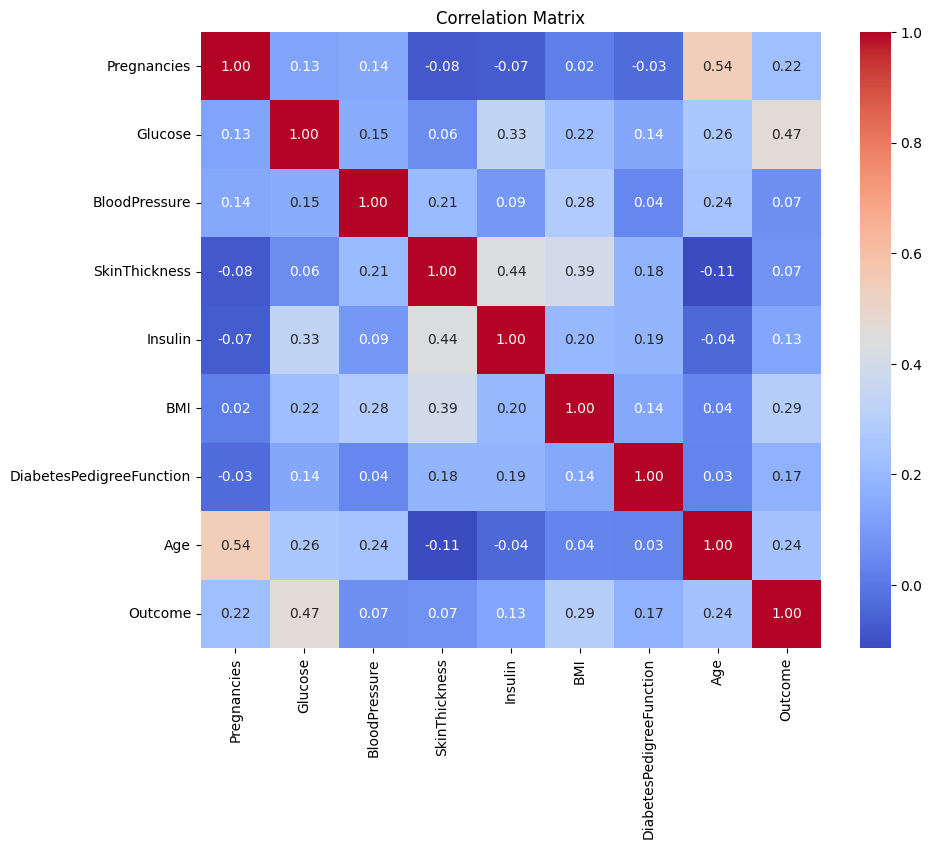

KeyError: 'insulin'

<Figure size 800x400 with 0 Axes>

In [ ]:
validate_cleaned_data(df)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.strip().str.lower()


In [ ]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def validate_cleaned_data(df):
    print("=== Dataset Shape ===")
    print(df.shape)
    
    print("\n=== Missing Values ===")
    print(df.isnull().sum())
    
    print("\n=== Duplicate Rows ===")
    print(df.duplicated().sum())
    
    print("\n=== Data Types ===")
    print(df.dtypes)
    
    print("\n=== Target Variable Distribution ===")
    print(df['outcome'].value_counts(normalize=True))
    
    print("\n=== Summary Statistics ===")
    print(df.describe())
    
    print("\n=== Sample Rows ===")
    print(df.sample(5))
    
    print("\n=== Correlation Matrix ===")
    plt.figure(figsize=(10,8))
    sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title("Correlation Matrix")
    plt.show()
    
    for col in ['insulin', 'skinthickness']:
        if col in df.columns:
            plt.figure(figsize=(8,4))
            sns.boxplot(x=df[col])
            plt.title(f"Boxplot of {col}")
            plt.show()
        else:
            print(f"Column '{col}' not found in DataFrame")

# Example call:
# validate_cleaned_data(df)


=== Dataset Shape ===
(768, 9)

=== Missing Values ===
pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64

=== Duplicate Rows ===
0

=== Data Types ===
pregnancies                   int64
glucose                       int64
bloodpressure                 int64
skinthickness                 int64
insulin                       int64
bmi                         float64
diabetespedigreefunction    float64
age                           int64
outcome                       int64
dtype: object

=== Target Variable Distribution ===
outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

=== Summary Statistics ===
       pregnancies     glucose  bloodpressure  skinthickness     insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.0

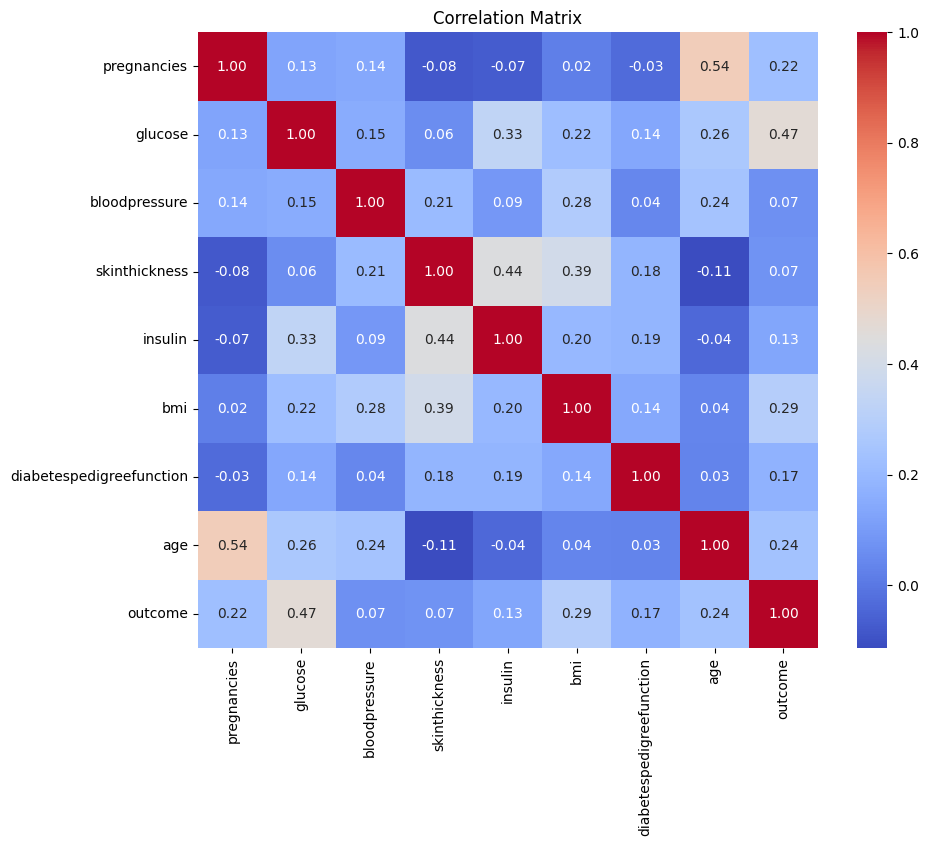

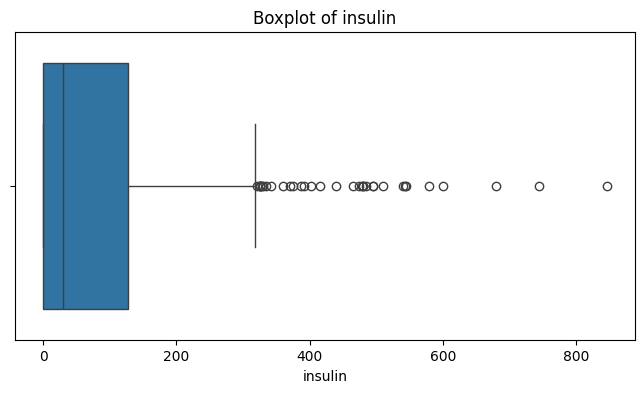

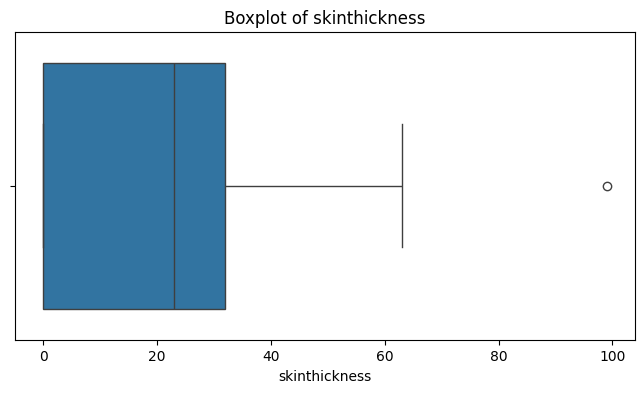

In [ ]:
validate_cleaned_data(df)

In [ ]:
df.to_csv('cleaned_data.csv', index=False)


In [ ]:
df.describe()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Replace zeroes with median (example for glucose)
for col in ['glucose', 'bloodpressure', 'skinthickness', 'insulin']:
    median = df[col].median()
    df[col] = df[col].replace(0, median)


In [ ]:
df[['glucose', 'bloodpressure', 'skinthickness', 'insulin']].head()

,glucose,bloodpressure,skinthickness,insulin
0,148,72,35,30.5
1,85,66,29,30.5
2,183,64,23,30.5
3,89,66,23,94.0
4,137,40,35,168.0


In [ ]:
df[['glucose', 'bloodpressure', 'skinthickness', 'insulin']].describe()

,glucose,bloodpressure,skinthickness,insulin
count,768.000000,768.000000,768.000000,768.000000
mean,121.656250,72.386719,27.334635,94.652344
std,30.438286,12.096642,9.229014,105.547598
min,44.000000,24.000000,7.000000,14.000000
25%,99.750000,64.000000,23.000000,30.500000
50%,117.000000,72.000000,23.000000,31.250000
75%,140.250000,80.000000,32.000000,127.250000
max,199.000000,122.000000,99.000000,846.000000


In [ ]:
df.to_csv('cleaned_data_final.csv', index=False)
